<a href="https://colab.research.google.com/github/LamineTourelab/Tutorial/blob/main/DecisionTrees_using_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Regression Trees in Python

## Objectives

Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a continuous dependent variable is known as a **Regression Tree**. In this script, i will :

+ Load, explore and prepare iris data
+ Build a Regression Tree model
+ Visualize the structure of the Regression Tree
+ Prune the Regression Tree

## 1. Load the iris Data

In [ ]:
from sklearn.datasets import load_iris
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 2. Explore the Data

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

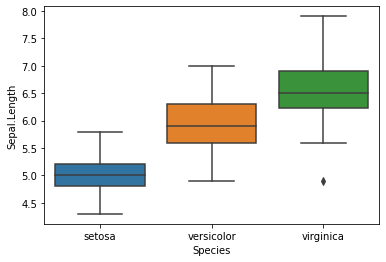

In [ ]:
ay=sns.boxplot(data = iris, x='Species', y = 'Sepal.Length')

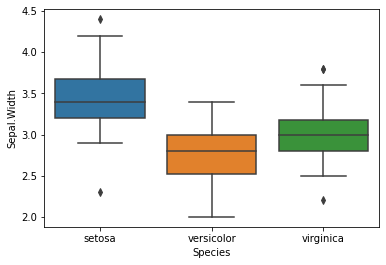

In [ ]:
ax=sns.boxplot(data = iris, x='Species', y = 'Sepal.Width')

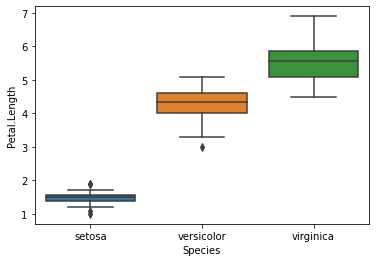

In [ ]:
ax=sns.boxplot(data = iris, x='Species', y = 'Petal.Length')

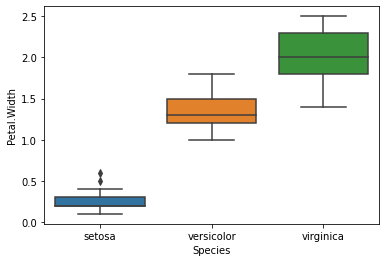

In [ ]:
ax=sns.boxplot(data = iris, x='Species', y = 'Petal.Width')

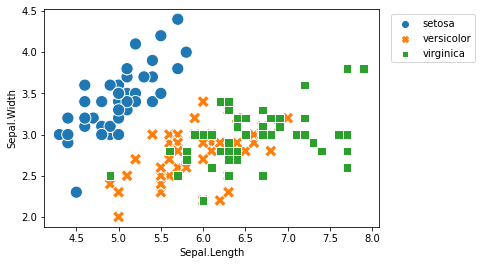

In [ ]:
ax = sns.scatterplot(data = iris,
                     x = 'Sepal.Length',
                     y = 'Sepal.Width',
                     hue = 'Species',
                     style = 'Species',
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

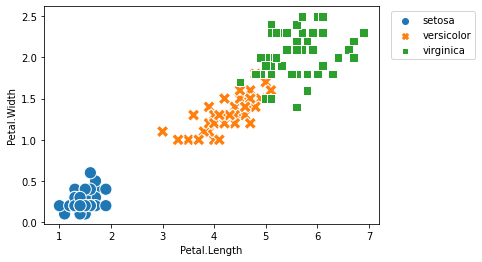

In [ ]:
ax = sns.scatterplot(data = iris,
                     x = 'Petal.Length',
                     y = 'Petal.Width',
                     hue = 'Species',
                     style = 'Species',
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

## 3. Prepare the Data

In [ ]:
import pandas as pd

In [ ]:
y=iris[['Sepal.Width']]

In [ ]:
X=iris[['Species','Sepal.Length',  'Petal.Length', 'Petal.Width']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.6,
                                                    stratify = X['Species'],
                                                    random_state = 1234)

In [ ]:
X_train.shape, X_test.shape

((90, 4), (60, 4))

In [ ]:
X_train.head()

,Species,Sepal.Length,Petal.Length,Petal.Width
61,versicolor,5.9,4.2,1.5
79,versicolor,5.7,3.5,1.0
8,setosa,4.4,1.4,0.2
140,virginica,6.7,5.6,2.4
81,versicolor,5.5,3.7,1.0


In [ ]:
X_train = pd.get_dummies(X_train)
X_train.head()

,Sepal.Length,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
61,5.9,4.2,1.5,0,1,0
79,5.7,3.5,1.0,0,1,0
8,4.4,1.4,0.2,1,0,0
140,6.7,5.6,2.4,0,0,1
81,5.5,3.7,1.0,0,1,0


In [ ]:
X_test = pd.get_dummies(X_test)
X_test.head()

,Sepal.Length,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
60,5.0,3.5,1.0,0,1,0
132,6.4,5.6,2.2,0,0,1
75,6.6,4.4,1.4,0,1,0
119,6.0,5.0,1.5,0,0,1
46,5.1,1.6,0.2,1,0,0


## 4. Train and Evaluate the Regression Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 1234)

In [ ]:
model = regressor.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

0.33023514005921195

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred

array([2.3 , 2.8 , 3.2 , 2.5 , 3.4 , 3.  , 3.4 , 3.1 , 3.1 , 3.1 , 2.9 ,
       3.1 , 2.5 , 3.2 , 3.5 , 2.8 , 3.3 , 3.6 , 3.6 , 2.8 , 3.  , 3.4 ,
       2.6 , 3.1 , 2.3 , 2.2 , 3.2 , 2.8 , 3.  , 2.5 , 3.  , 3.  , 3.2 ,
       3.1 , 3.1 , 3.2 , 3.4 , 3.6 , 2.3 , 3.2 , 2.8 , 3.1 , 3.  , 3.8 ,
       3.  , 3.4 , 3.4 , 3.6 , 3.8 , 3.45, 2.9 , 2.7 , 2.9 , 3.4 , 2.3 ,
       3.  , 2.9 , 3.4 , 2.9 , 2.9 ])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_test_pred)

0.28083333333333343

## 5. Visualize the Regression Tree

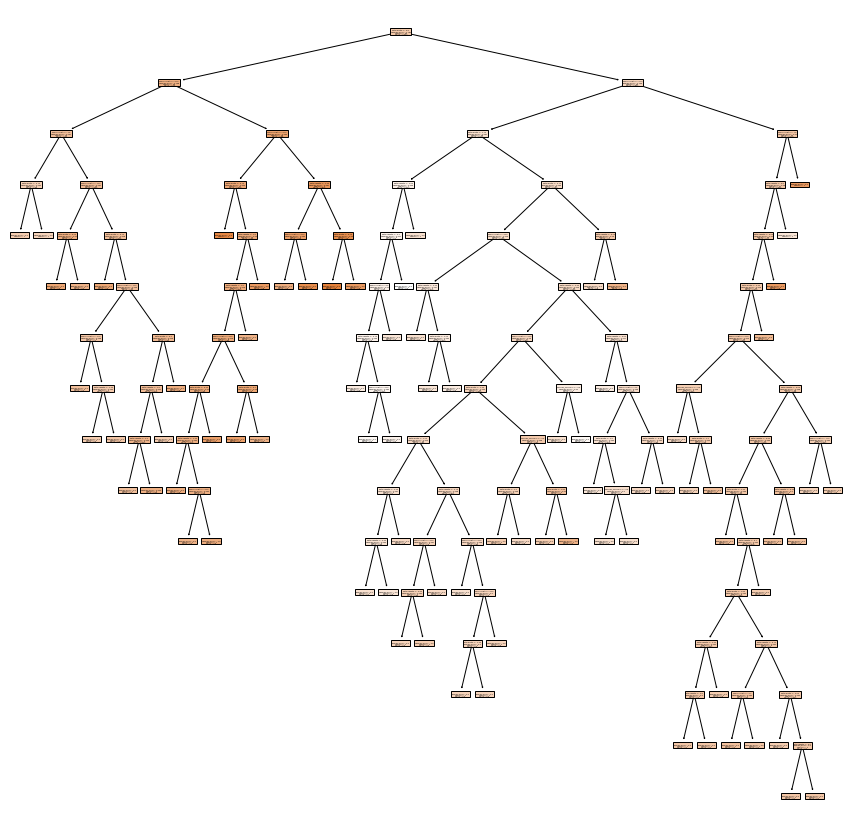

In [ ]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model,
                   feature_names = list(X_train.columns),
                   filled = True);

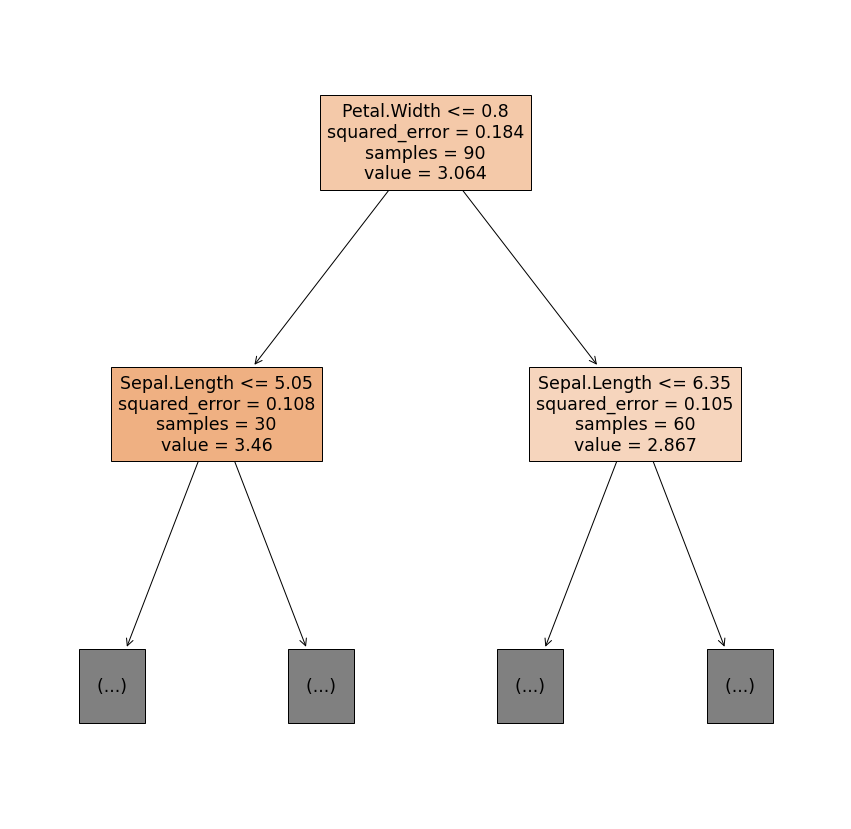

In [ ]:
plt.figure(figsize = (15,15))
tree.plot_tree(model,
               feature_names = list(X_train.columns),
               filled = True,
               max_depth = 1);

In [ ]:
importance = model.feature_importances_
importance

array([0.33538054, 0.10600708, 0.54609818, 0.        , 0.01251419,
       0.        ])

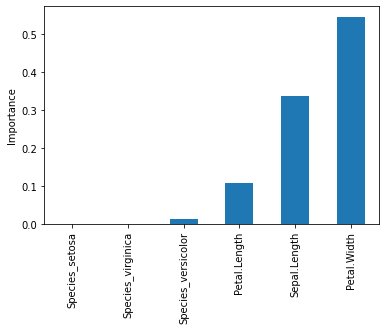

In [ ]:
feature_importance = pd.Series(importance, index = X_train.columns)
feature_importance.sort_values().plot(kind = 'bar')
plt.ylabel('Importance');

## 6. Prune the Regression Tree

Pruning is use in decision trees training to avoid overfitting. It's can happen if we allow it to grow to its max depth and in another hand we can also stop the it earlier. To avoid overfitting, we can apply early stopping rules know as pre-pruning. Another option to avoid overfitting is to apply post-pruning (sometimes just called pruning). If you want to learn about these two methods, check these articles, for [pre-pruning](https://towardsdatascience.com/pre-pruning-or-post-pruning-1dbc8be5cb14), and [post-pruning](https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107).

In [ ]:
model.score(X_train, y_train)

0.9972869047938048

In [ ]:
model.score(X_test, y_test)

0.33023514005921195

Let's get the list of effective alphas for the training data.

In [ ]:
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
list(ccp_alphas)

[0.0,
 3.947459643111668e-17,
 3.947459643111668e-17,
 7.894919286223336e-17,
 7.894919286223336e-17,
 9.868649107779169e-17,
 4.166666666660903e-05,
 5.5555555555465556e-05,
 5.55555555555445e-05,
 5.555555555556424e-05,
 5.5555555555593844e-05,
 5.555555555562345e-05,
 6.597222222212274e-05,
 7.407407407402644e-05,
 7.407407407406591e-05,
 7.407407407408565e-05,
 7.407407407414487e-05,
 7.561728395083143e-05,
 8.333333333323781e-05,
 0.00014814814814807263,
 0.0001493827160493745,
 0.0001666666666666039,
 0.00016666666666671244,
 0.000190476190476099,
 0.0002222222222222175,
 0.00022407407407397286,
 0.00023148148148146832,
 0.00029629629629641165,
 0.0003555555555555361,
 0.00036805555555567476,
 0.00037037037037030985,
 0.0004537037037035871,
 0.00046296296296299594,
 0.0004637345679009987,
 0.0005333333333332648,
 0.0006007147498388933,
 0.0006857142857141045,
 0.0007111111111110131,
 0.0007851851851852073,
 0.0008571428571428207,
 0.00088888888888887,
 0.0008888888888888897,
 0.0

We remove the maximum effective alpha because it is the trivial tree with just one node.

In [ ]:
ccp_alphas = ccp_alphas[:-1]
list(ccp_alphas)

[0.0,
 3.947459643111668e-17,
 3.947459643111668e-17,
 7.894919286223336e-17,
 7.894919286223336e-17,
 9.868649107779169e-17,
 4.166666666660903e-05,
 5.5555555555465556e-05,
 5.55555555555445e-05,
 5.555555555556424e-05,
 5.5555555555593844e-05,
 5.555555555562345e-05,
 6.597222222212274e-05,
 7.407407407402644e-05,
 7.407407407406591e-05,
 7.407407407408565e-05,
 7.407407407414487e-05,
 7.561728395083143e-05,
 8.333333333323781e-05,
 0.00014814814814807263,
 0.0001493827160493745,
 0.0001666666666666039,
 0.00016666666666671244,
 0.000190476190476099,
 0.0002222222222222175,
 0.00022407407407397286,
 0.00023148148148146832,
 0.00029629629629641165,
 0.0003555555555555361,
 0.00036805555555567476,
 0.00037037037037030985,
 0.0004537037037035871,
 0.00046296296296299594,
 0.0004637345679009987,
 0.0005333333333332648,
 0.0006007147498388933,
 0.0006857142857141045,
 0.0007111111111110131,
 0.0007851851851852073,
 0.0008571428571428207,
 0.00088888888888887,
 0.0008888888888888897,
 0.0

Next, we train several trees using the different values for alpha.

In [ ]:
train_scores, test_scores = [], []
for alpha in ccp_alphas:
    regressor_ = DecisionTreeRegressor(random_state = 1234, ccp_alpha = alpha)
    model_ = regressor_.fit(X_train, y_train)
    train_scores.append(model_.score(X_train, y_train))
    test_scores.append(model_.score(X_test, y_test))

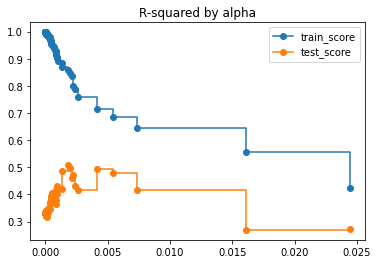

In [ ]:
plt.plot(ccp_alphas,
         train_scores,
         marker = "o",
         label = 'train_score',
         drawstyle = "steps-post")
plt.plot(ccp_alphas,
         test_scores,
         marker = "o",
         label = 'test_score',
         drawstyle = "steps-post")
plt.legend()
plt.title('R-squared by alpha');

In [ ]:
test_scores

[0.33023514005921195,
 0.33023514005921195,
 0.33023514005921195,
 0.33023514005921195,
 0.33023514005921195,
 0.33023514005921195,
 0.33989623662035984,
 0.33989623662035984,
 0.33989623662035984,
 0.3375476827601912,
 0.3407502562058755,
 0.3407502562058755,
 0.3404566869733544,
 0.3374201728915204,
 0.3294493234267061,
 0.3309675804676231,
 0.3294493234267061,
 0.3220988901962767,
 0.3207644845939083,
 0.31867688116264736,
 0.3315133227055339,
 0.330659303120018,
 0.3334348667729443,
 0.3337137303110721,
 0.34737804367932534,
 0.3448129009631634,
 0.3461769600233623,
 0.34807478132450853,
 0.34506863238349283,
 0.3658675677057428,
 0.3738384171705572,
 0.3767859708789002,
 0.3830725039389472,
 0.3952007681915851,
 0.40503907381672744,
 0.3847448715609173,
 0.3891118745679958,
 0.3928467868886516,
 0.4042640798363476,
 0.4015974472530024,
 0.3640205854903058,
 0.3811009772006224,
 0.4152617606212555,
 0.40073156628435425,
 0.42957845006177786,
 0.41970384860425103,
 0.418388658442556

In [ ]:
ix = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[ix]
best_alpha

0.00179259259259279

In [ ]:
regressor_ = DecisionTreeRegressor(random_state = 1234, ccp_alpha = best_alpha)
model_ = regressor_.fit(X_train, y_train)

In [ ]:
model_.score(X_train, y_train)

0.8589647876821336

In [ ]:
model_.score(X_test, y_test)

0.5081524504377486

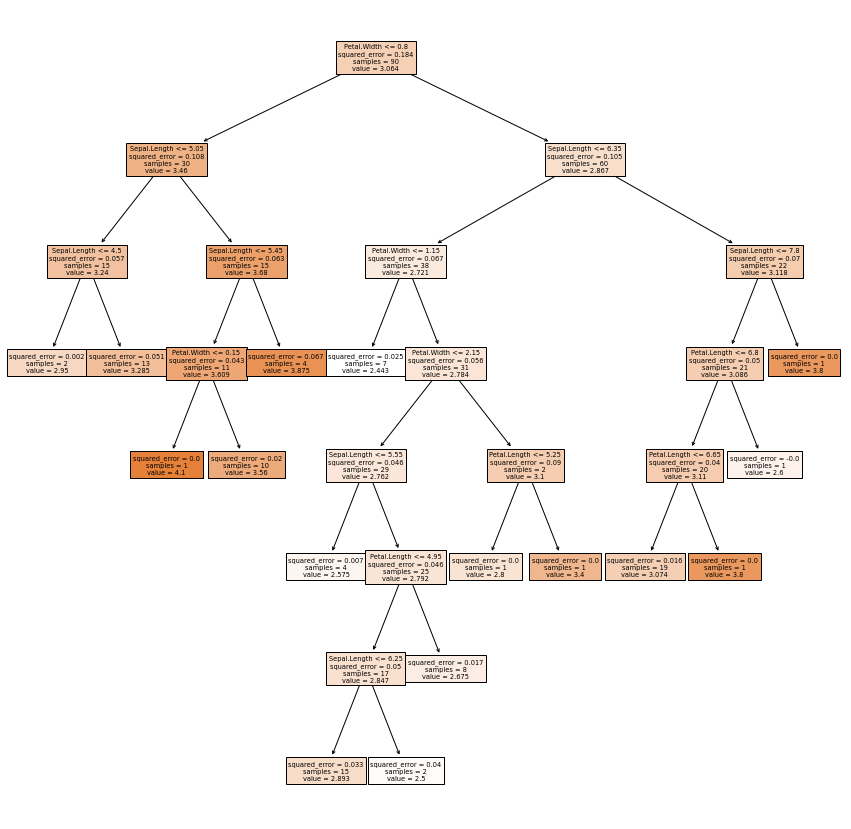

In [ ]:
plt.figure(figsize = (15,15))
tree.plot_tree(model_,
                   feature_names = list(X_train.columns),
                   filled = True);